In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
dataframe = pd.read_csv("C:\Sample_\ML\diabetes.csv")

In [3]:
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df = dataframe.copy()

In [5]:
import warnings
warnings.filterwarnings("ignore")

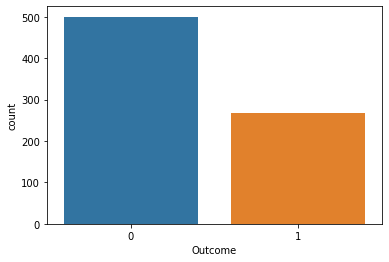

In [6]:
sns.countplot(df['Outcome'],label="Count")

# EDA


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Replacing NAN values with 0 

In [10]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [11]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

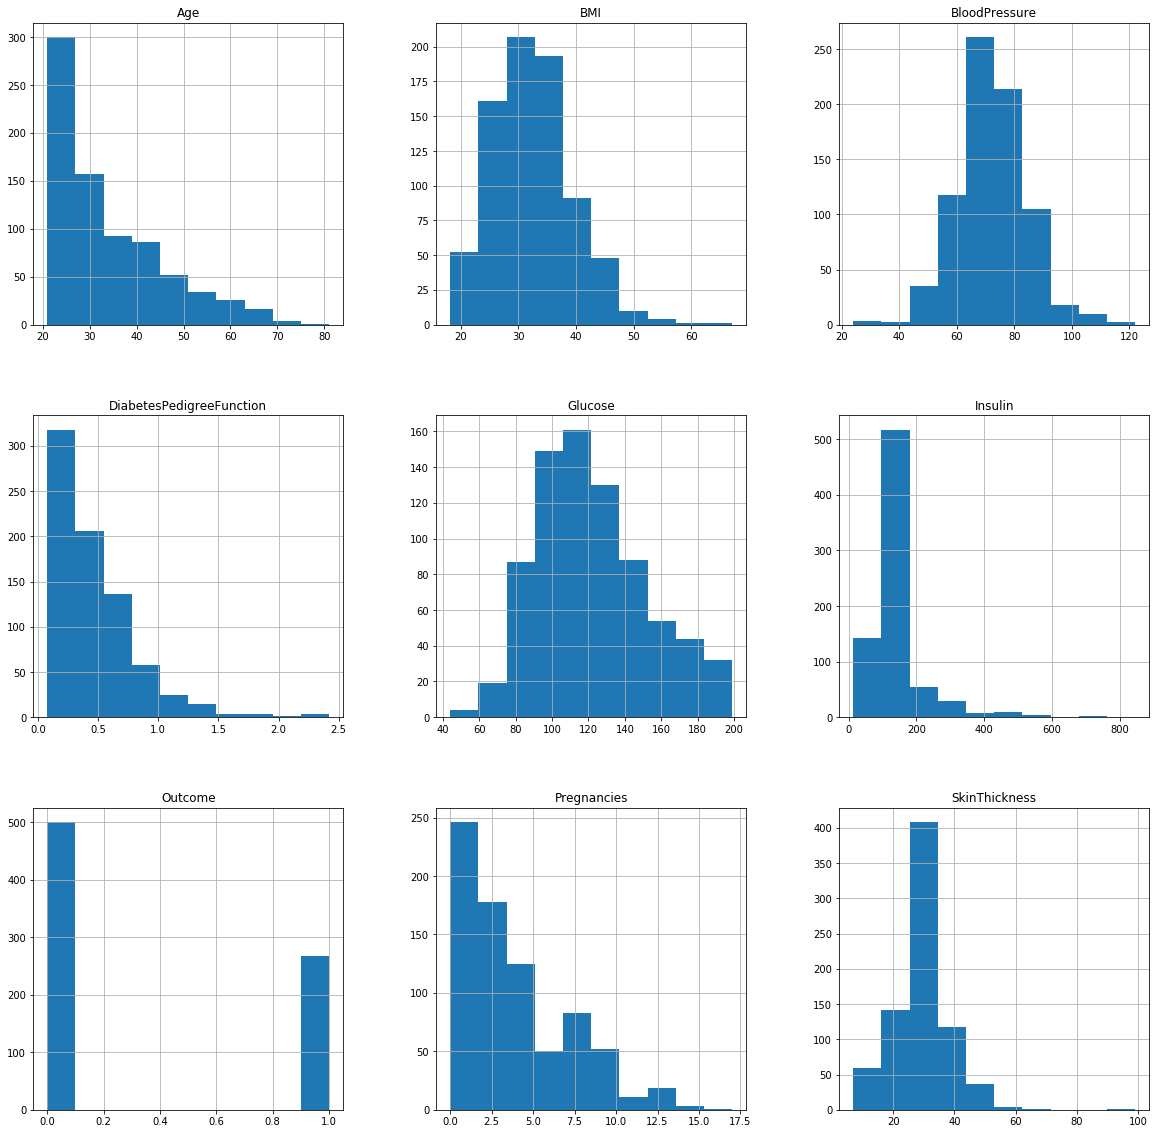

In [13]:
p = df.hist(figsize = (20,20))

## Correlation between all the features 

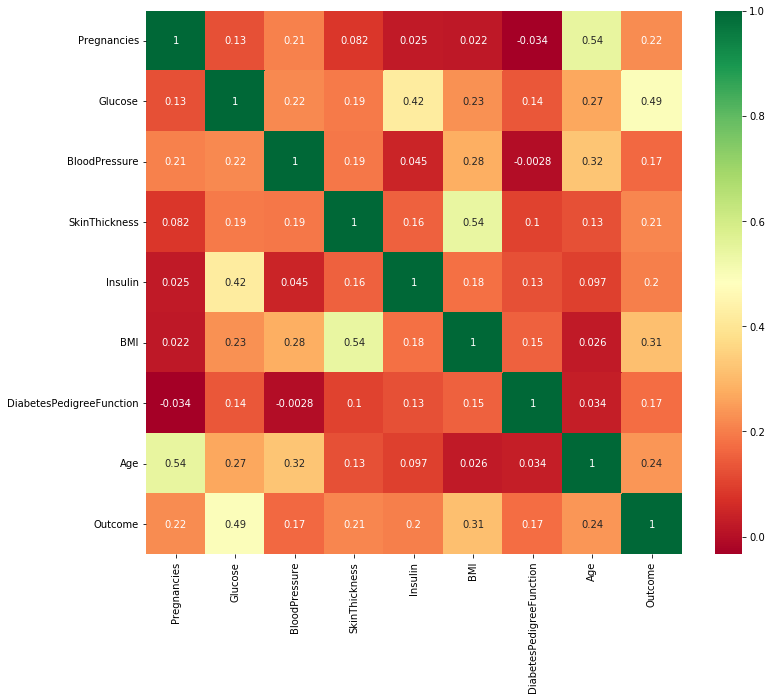

In [14]:
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

## Model Building

### Spliting the dataset 

In [15]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

## Feature Scaling 

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Logistic Regression 

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [20]:
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [21]:
predictions =  model1.predict(X_test)
r2 = r2_score(y_test,predictions)
rmse = mean_squared_error(y_test,predictions,squared=False)

accuracy_score(y_test,predictions)

## KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
training_accuracy = []
test_accuracy = []

In [24]:
# try n_neighbors from 1 to 25
neighbors_range = range(1, 25)
for n_neighbors in neighbors_range:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

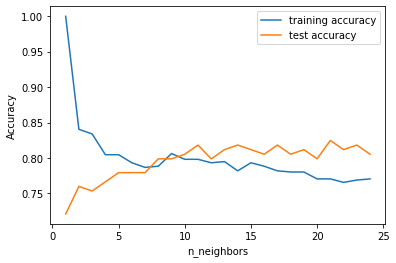

In [25]:
plt.plot(neighbors_range, training_accuracy, label="training accuracy")
plt.plot(neighbors_range, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Accuracy Score of KNN to predict Diabetes (K=9)

In [26]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.80


## SVM

In [27]:
from sklearn.svm import SVC

In [28]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [29]:
svc_pred = svc_model.predict(X_test)

In [31]:
print("Accuracy Score =", format(accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7792207792207793


## Random Forest 

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [35]:
rfc_train = rfc.predict(X_train)

In [36]:
print("Accuracy_Score =", format(accuracy_score(y_train, rfc_train))) # Overfitting

Accuracy_Score = 1.0


In [37]:
rfc_test = rfc.predict(X_test)

In [38]:
print("Accuracy_Score =", format(accuracy_score(y_test, rfc_test)))

Accuracy_Score = 0.7987012987012987


## Feature Importance 

In [39]:
rfc.feature_importances_

array([0.07895003, 0.25021457, 0.08586781, 0.07497264, 0.0898615 ,
       0.15773319, 0.12467471, 0.13772554])

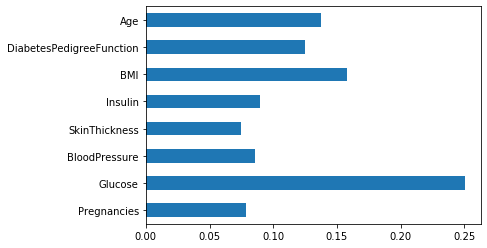

In [40]:
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))

## Saving the file 

In [41]:
import pickle

In [43]:
pickle.dump(knn, open('classifier.pkl','wb'))

In [44]:
pickle.dump(sc, open('sc.pkl','wb'))